### Bike Detils (EDA)

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('Bike details.csv')

In [31]:
df.shape

(1061, 7)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [33]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


Q1) What is the range of selling prices in the dataset ?

In [34]:
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
price_range = max_price - min_price
print(f"The range of selling prices is {price_range}.")

The range of selling prices is 755000.


Q2) What is the median selling price for bikes in the dataset ?

In [35]:
df['selling_price'].median()

45000.0

Q3) What is the most common seller type ?

In [36]:
df['seller_type'].mode()

,seller_type
0,Individual


Q4) How many bikes have driven more than 50,000 kilometers ?

In [37]:
km_driven_count = len(df[df['km_driven'] > 50000])
km_driven_count

170

Q5) What is the average km_driven value for each ownership type ?

In [38]:
ownership_km_driven = df.groupby('owner')['km_driven'].mean()
ownership_km_driven

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


Q6) What proportion of bikes are from the year 2015 or older ?

In [39]:
len(df[df['year'] <= 2015]) / len(df)

0.5664467483506126

Q7) What is the trend of missing values across the dataset ?

In [42]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_percentage

,0
name,0.000000
selling_price,0.000000
year,0.000000
seller_type,0.000000
owner,0.000000
km_driven,0.000000
ex_showroom_price,40.999057


Q8)  What is the highest ex_showroom_price recorded, and for which bike ?

In [49]:
highest_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_highest_price = df.loc[df['ex_showroom_price'] == highest_ex_showroom_price, 'name'].iloc[0]

print(f"The highest ex_showroom_price is {highest_ex_showroom_price} for the bike {bike_with_highest_price}")

The highest ex_showroom_price is 1278000.0 for the bike Harley-Davidson Street Bob


Q9) What is the total number of bikes listed by each seller type ?

In [50]:
df.groupby('seller_type')['name'].count()

,name
seller_type,
Dealer,6
Individual,1055


Q10)  What is the relationship between selling_price and km_driven for first-owner bikes ?

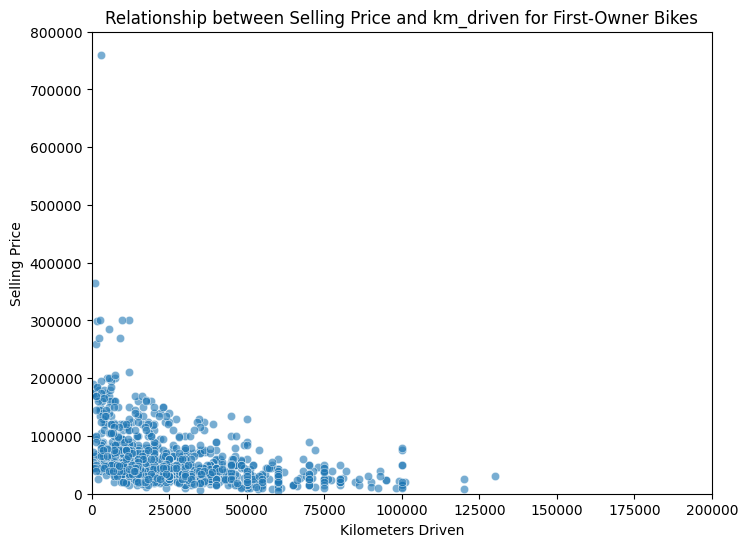

In [63]:
first_owner_bikes = df[df['owner'] == '1st owner']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='km_driven', y='selling_price', data = first_owner_bikes, alpha=0.6)

plt.title('Relationship between Selling Price and km_driven for First-Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')

plt.xlim(0, 200000)
plt.ylim(0, 800000)

plt.show()

Insights > The Kilometer of the bike is increases, the price of the bike decreases

Q11)  Identify and remove outliers in the km_driven column using the IQR method.

In [69]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


Q12)  Perform a bivariate analysis to visualize the relationship between year and selling_price.

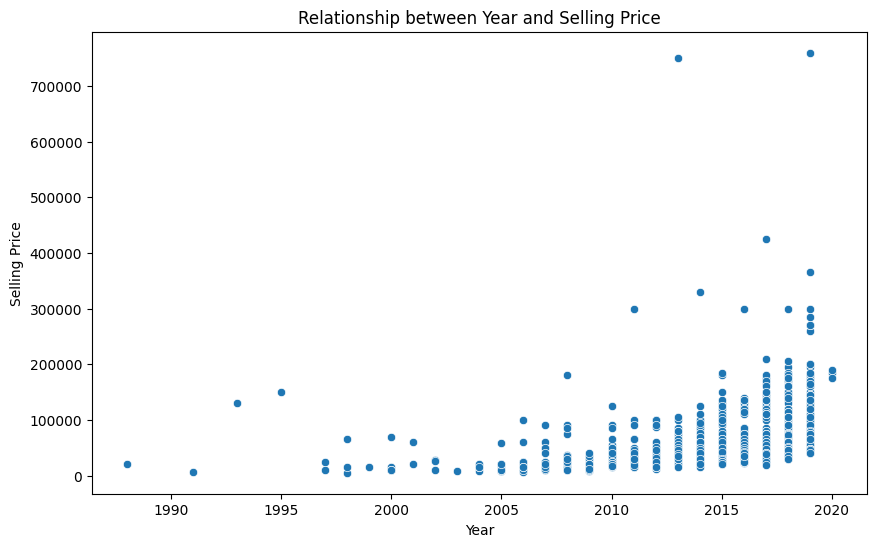

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data = df)
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

Insights >  year between 2015 - 2020 Bike prices are increased.

Q13)  What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year) ?

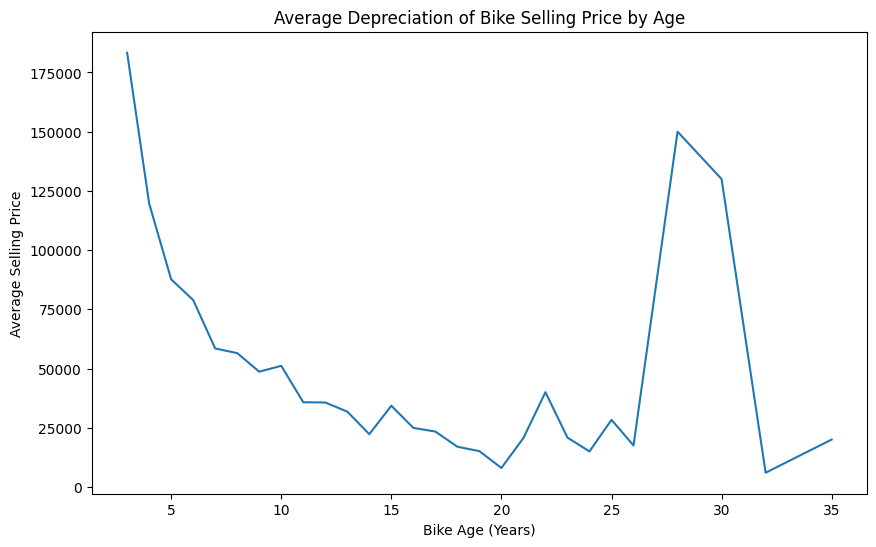

In [77]:
# Calculate the age of each bike
current_year = 2023
df['bike_age'] = current_year - df['year']

# Calculate the average depreciation for each bike age
depreciation_by_age = df.groupby('bike_age')['selling_price'].mean()

plt.figure(figsize=(10, 6))
plt.plot(depreciation_by_age.index, depreciation_by_age.values)
plt.xlabel("Bike Age (Years)")
plt.ylabel("Average Selling Price")
plt.title("Average Depreciation of Bike Selling Price by Age")
plt.show()

Insights > The selling price drops significantly in the first few years, indicating that bikes lose a large portion of their value early on. There are unexpected spikes around 25-30 years, which could indicate rare or classic bikes holding or even increasing in value.

Q14) Which bike names are priced significantly above the average price for their manufacturing year ?

In [80]:
# Calculate the average selling price for each year
average_price_by_year = df.groupby('year')['selling_price'].mean()

# Merge the average price back into the original DataFrame
df['average_price_for_year'] = df['year'].map(average_price_by_year)

# Identify bikes priced significantly above average for their year
df['price_deviation'] = df['selling_price'] - df['average_price_for_year']
threshold = 2 * df['selling_price'].std()  # Adjust the threshold as needed
significantly_above_average = df[df['price_deviation'] > threshold]

print(significantly_above_average['name'])

7      Royal Enfield Bullet 350 [2007-2011]
13                            Yamaha YZF R3
130        Royal Enfield Continental GT 650
134              Harley-Davidson Street Bob
242                              KTM RC 390
261           Royal Enfield Interceptor 650
288                              KTM RC 390
289          Kawasaki Ninja 650 [2018-2019]
295                         Suzuki GSX S750
311              Harley-Davidson Street 750
315           Royal Enfield Interceptor 650
344                              BMW G310GS
407           Royal Enfield Interceptor 650
411            KTM 390 Duke ABS [2013-2016]
860          Kawasaki Ninja 650 [2018-2019]
890            Royal Enfield Classic Chrome
892                            KTM 390 Duke
897                      Kawasaki Ninja 300
Name: name, dtype: object


Q15) Develop a correlation matrix for numeric columns and visualize it using a heatmap.

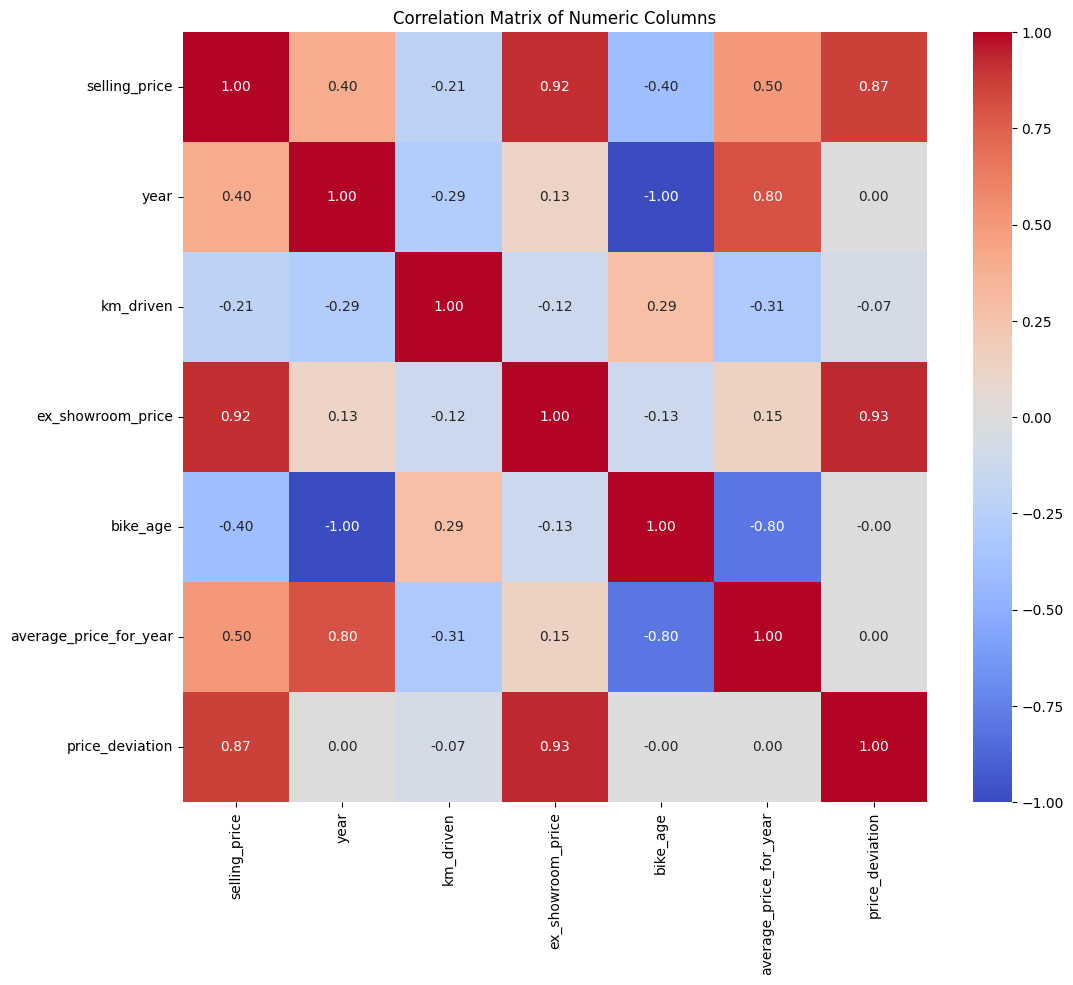

In [85]:
# Select only numeric columns
numeric_cols = df.loc[:, df.dtypes != 'object']
# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()